In [46]:

import pandas as pd

games =open("games.csv").read()

df=pd.read_csv("games.csv",sep=",",header=0)
print(df.head())

       gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0  3326086514  1504279457970          1949         9       1           2   
1  3229566029  1497848803862          1851         9       1           1   
2  3327363504  1504360103310          1493         9       1           2   
3  3326856598  1504348503996          1758         9       1           1   
4  3330080762  1504554410899          2094         9       1           2   

   firstTower  firstInhibitor  firstBaron  firstDragon  ...  t2_towerKills  \
0           1               1           1            1  ...              5   
1           1               1           0            1  ...              2   
2           1               1           1            2  ...              2   
3           1               1           1            1  ...              0   
4           1               1           1            1  ...              3   

   t2_inhibitorKills  t2_baronKills  t2_dragonKills  t2_riftHeraldKills  \

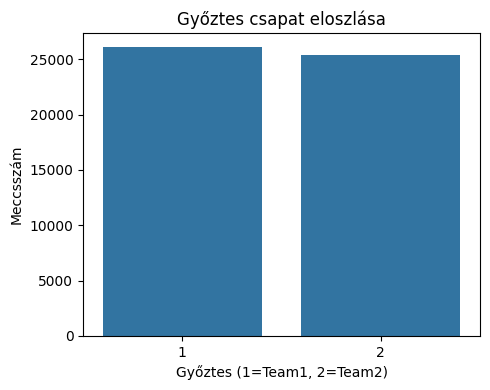

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Célváltozó
y = df['winner']

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title('Győztes csapat eloszlása')
plt.xlabel('Győztes (1=Team1, 2=Team2)')
plt.ylabel('Meccsszám')
plt.tight_layout()
plt.show()

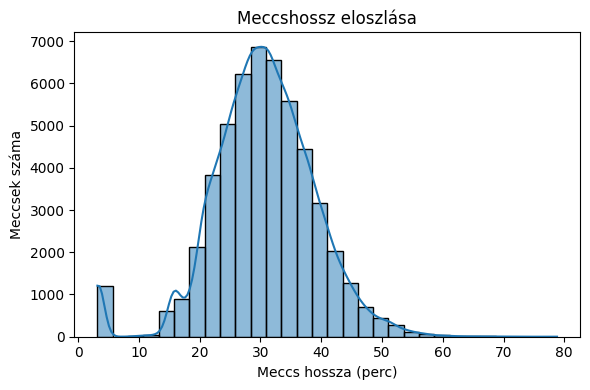

In [48]:
plt.figure(figsize=(6,4))
sns.histplot(df['gameDuration']/60, bins=30, kde=True)
plt.title('Meccshossz eloszlása')
plt.xlabel('Meccs hossza (perc)')
plt.ylabel('Meccsek száma')
plt.tight_layout()
plt.show()

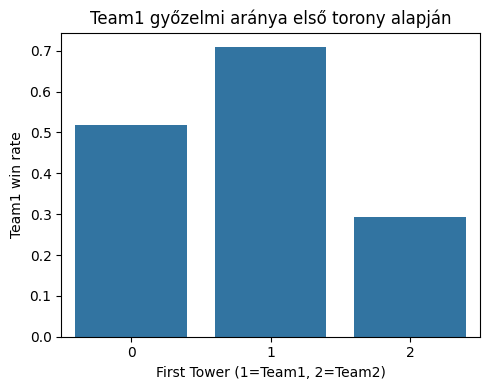

In [ ]:

df['win_t1'] = (df['winner'] == 1).astype(int)

plt.figure(figsize=(5,4))
sns.barplot(
    data=df,
    x='firstTower', 
    y='win_t1',
    errorbar=None
)
plt.title('Team1 győzelmi aránya első torony alapján')
plt.xlabel('First Tower (1=Team1, 2=Team2)')
plt.ylabel('Team1 win rate')
plt.tight_layout()
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Eldobjuk a nyilván nem használható oszlopokat
drop_cols = ['winner', 'gameId', 'creationTime', "win_t1"]
X = df.drop(columns=drop_cols)
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


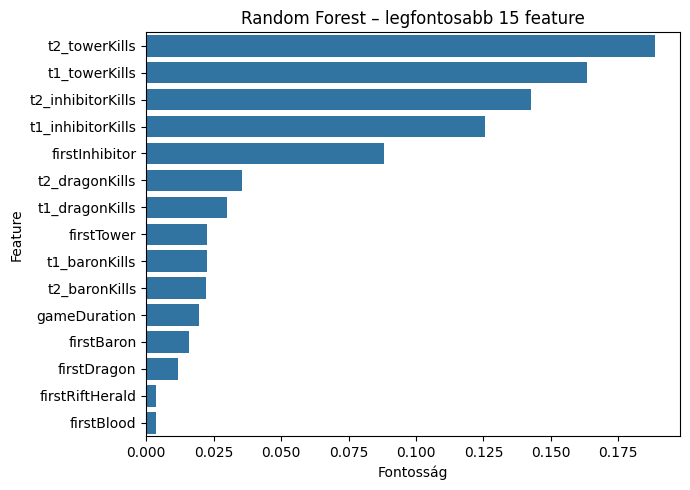

In [ ]:
import numpy as np

importances = model.feature_importances_
idx = np.argsort(importances)[::-1] 

top_n = 15
top_idx = idx[:top_n]

plt.figure(figsize=(7,5))
sns.barplot(
    x=importances[top_idx],
    y=X.columns[top_idx]
)
plt.title('Random Forest – legfontosabb 15 feature')
plt.xlabel('Fontosság')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Pontosság:", acc)
print("Konfúziós mátrix:")
print(cm)

Pontosság: 0.9697028549232861
Konfúziós mátrix:
[[5054  161]
 [ 151 4932]]


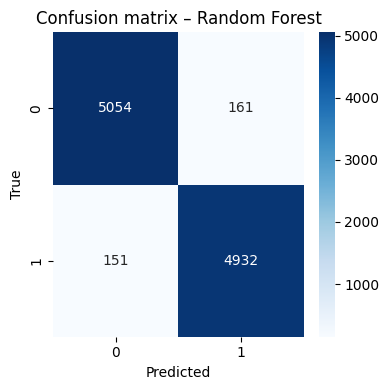

In [58]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix – Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

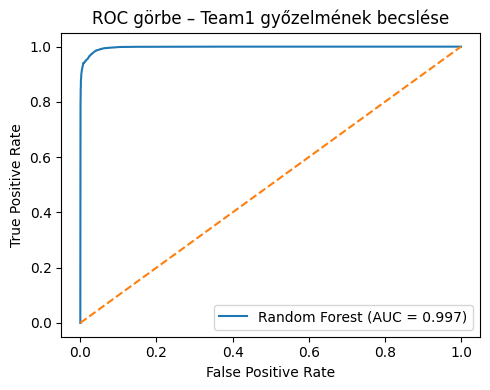

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

# alakítsuk át
y_bin = (df['winner'] == 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, thr = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC görbe – Team1 győzelmének becslése')
plt.legend()
plt.tight_layout()
plt.show()